# Import modelflow

In [30]:
%load_ext autoreload
%autoreload 0

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [1]:
%matplotlib inline

from ipywidgets import interact,Dropdown,Checkbox
from IPython.display import display, clear_output,Latex, Markdown
import pandas as pd

import modeljupyter as mj
from modelvis import waterplot


from modelclass import model
model.widescreen()

In [2]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines){
    return false;
}

<IPython.core.display.Javascript object>

# Load model and data, and run 

In [3]:
if not 'masia' in locals():
    print('Load model')
    masia,baseline = model.modelload('Asia.pcim',run=1,silent=1)

Load model


In [11]:
xx = masia(baseline,stats=1,ljit=1,chunk=10,first_test=1,max_iterations=1000,conv='wld_co2')

Setup time (seconds)                 :           0.02
Foating point operations  core       :         48,105
Foating point operations  prolog     :         48,303
Foating point operations  epilog     :         68,606
Simulation period                    :             30
Total iterations                     :             90
Total floating point operations      :      7,836,720
Simulation time (seconds)            :           0.77
Floating point operations per second :   10,118,980.7


In [38]:
xx = masia(xx,stats=1,ljit=0,chunk=10,first_test=2,max_iterations=1000,conv='wld_co2')

Setup time (seconds)                 :           0.02
Foating point operations  core       :         48,105
Foating point operations  prolog     :         48,303
Foating point operations  epilog     :         68,606
Simulation period                    :             30
Total iterations                     :            120
Total floating point operations      :      9,279,870
Simulation time (seconds)            :           3.06
Floating point operations per second :    3,031,153.2


In [40]:
xx = masia(xx,stats=1,ljit=1,chunk=10,first_test=10,max_iterations=1000,conv='wld_co2')

Setup time (seconds)                 :           0.02
Foating point operations  core       :         48,105
Foating point operations  prolog     :         48,303
Foating point operations  epilog     :         68,606
Simulation period                    :             30
Total iterations                     :            360
Total floating point operations      :     20,825,070
Simulation time (seconds)            :           0.79
Floating point operations per second :   26,325,803.9


In [45]:
from inject import inject
inject(masia)

In [55]:
co2_input_var = [var for var in masia.totgraph.predecessors('WLD_CO2') if var.endswith('CO2')]
co2_input_var_asean = [var for var in masia.totgraph.predecessors('WLD_CO2') if var.endswith('CO2') and  var.split('_')[0] in masia.countries_ASEAN ]
co2_input_var_asean

['THA_CO2',
 'KHM_CO2',
 'SGP_CO2',
 'MYS_CO2',
 'LAO_CO2',
 'VNM_CO2',
 'PHL_CO2',
 'IDN_CO2',
 'BRN_CO2',
 'MMR_CO2']

In [63]:
co2_baseline = baseline.loc[:,co2_input_var].pipe(lambda df:df.rename(columns={c : masia.iso_dict.get(cname := c.split('_')[0],cname) for c in df.columns}))
co2_baseline_asean = baseline.loc[:,co2_input_var_asean].pipe(lambda df:df.rename(columns={c : masia.iso_dict.get(cname := c.split('_')[0],cname) for c in df.columns}))

# Variables to inputwidget

In [48]:
outvar = 'GDI GCARBR CO2 LNN'.split()
displayvar = 'WLD_CO2 ASP_CO2 G20_CO2 '

#  masia.countries_GCARBR_A is list of all countries in the model with a countries_GCARBR_A 
#  masia.countries_ASEAN is list of all countries in ASEAN 
countries_rest = [country for country in masia.countries_GCARBR_A if country not in masia.countries_ASEAN]

slidedef_allasean =  {'All ASEAN countries' : {'var': ' '.join([f'{country}_GCARBR_A' for country in masia.countries_ASEAN ])
                          , 'value': 0.0,'min':0,'max':100,'op':'+impulse','step':10,'dec':0}}
slidedef_allrest =  {'Rest of the world' : {'var': 
    ' '.join([f'{country}_GCARBR_A' for country in countries_rest])
                          , 'value': 0.0,'min':0,'max':100,'op':'+impulse','step':10,'dec':0}}
slidedef_countries = {masia.iso_dict.get(country,country)+', Extra' : 
                      {'var': f'{country}_GCARBR_A', 'value': 0.0,'min':-40,'max':40,'op':'+impulse','step':10,'dec':0} 
                      for country in  masia.countries_ASEAN}

slidedef = {**slidedef_allasean,**slidedef_allrest,**slidedef_countries}

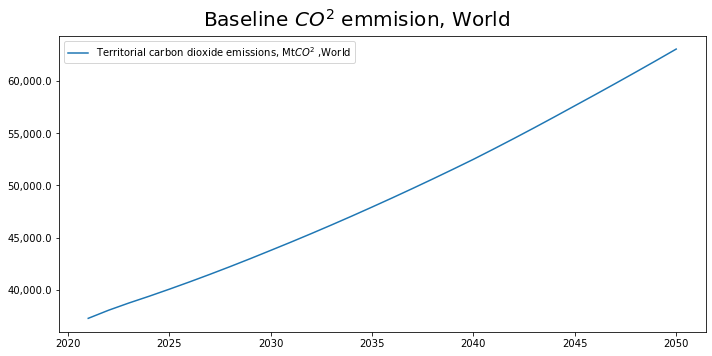

In [58]:
masia['wld_co2'].rename().plot(colrow=1,title='Baseline $CO^2$ emmision, World',top=0.9,ysize=5);

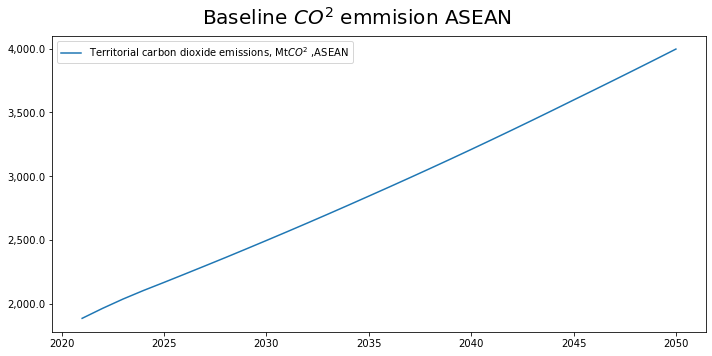

In [59]:
masia['asean_co2'].rename().plot(colrow=1,title='Baseline $CO^2$ emmision ASEAN',top=0.9,ysize=5);

# Emmision with no policy 
Countries where the emmision is below the threshold are all attributed to the "small" label

In [60]:
@interact(Threshold = (0,3000,100))
def explain(Periode   = Dropdown(options = masia.current_per,value=2049),
            Threshold =700):

    waterplot(co2_baseline.loc[[Periode],:].T,autosum=1,threshold = Threshold,allsort=1,title = '$CO^2$ emmision,World in',top=0.88);

interactive(children=(Dropdown(description='Periode', index=28, options=(2021, 2022, 2023, 2024, 2025, 2026, 2…

In [66]:
@interact(Threshold = (0,3000,100))
def explain(Periode   = Dropdown(options = masia.current_per,value=2049),
            Threshold =0):

    waterplot(co2_baseline_asean.loc[[Periode],:].T,autosum=1,threshold = Threshold,allsort=1,title = '$CO^2$ emmision,ASEAN in',top=0.88);

interactive(children=(Dropdown(description='Periode', index=28, options=(2021, 2022, 2023, 2024, 2025, 2026, 2…

# Make some policy 

In [67]:
inject(masia)
input = masia.inputwidget_asia(2021,2050,slidedef=slidedef
                   ,showout=True,varpat=displayvar,showvar=True,go_now=1)

# Where does the reduction originate
The threshold leved and year can be chosen.
Countries where the reduction is below the threshold are all attributed to the "small" label  

In [ ]:

@interact(Threshold = (1,300,10))
def explain(Periode   = Dropdown(options = masia.current_per,value=2049),
            Threshold =200):
    masia.dekomp_plot('WLD_CO2',pct=0,threshold=Threshold,nametrans=masia.country_get)
    masia.dekomp_plot_per('WLD_CO2',pct=0,threshold=Threshold,per=Periode,sort=True,nametrans=masia.country_get)


In [ ]:

@interact(Threshold = (0,300,10))
def explain(Periode   = Dropdown(options = masia.current_per,value=2049),
            Threshold =10):
    masia.dekomp_plot('ASEAN_CO2',pct=0,threshold=Threshold,nametrans=masia.country_get)
    masia.dekomp_plot_per('ASEAN_CO2',pct=0,threshold=Threshold,per=Periode,sort=True,nametrans=masia.country_get)


In [ ]:
print(masia.get_eq_des('USA_EC',show_all=1))

In [ ]:
masia.USA_EC.tracepre(HR=0)

# Inversion of the model

In [ ]:
instruments = [[f'{country}_GCARBR_A' for country in masia.countries_GCARBR_A]]
instruments

In [ ]:
target = pd.DataFrame([36_440],index=[2049],columns=['WLD_CO2'])
target

In [ ]:
delay = 2049-2021
delay 

In [42]:
from modelinvert import targets_instruments

In [44]:
t_i = targets_instruments(databank=baseline,targets=target,instruments=instruments,model=masia,DefaultImpuls=50.,defaultconv=20,varimpulse=True)
t_i.targets

NameError: name 'target' is not defined

In [43]:
t_i.jacobi(2049,28)

NameError: name 't_i' is not defined

In [ ]:
t_i.debug=0
res = t_i(delay=29,varimpulse=True,silent=0)

In [ ]:
masia.calculate_freq_list(masia.coreorder)

In [ ]:
masia.flop_get

In [ ]:
masia.wld_co2

In [ ]:
masia.exodif()